In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random as alea
from scipy.linalg import solve,pinv,pinv2
from scipy.spatial.distance import pdist, squareform
import pandas as pd
from sklearn.decomposition import PCA
import time

In [2]:
# import nSimplices 
exec(compile(open(r"nsimplices.py", encoding="utf8").read(), "nsimplices.py", 'exec'))

# set matplotlib default savefig directory
plt.rcParams["savefig.directory"] = os.getcwd() # To save figures to directory
                                                #   defined above

Section 2.1.1: Cross dataset

In [3]:
### Prepare the dataset
df_cross = []
# for x in range(-6,7,1):
#     df_cross.append([x, 0, 0])
# for y in range(-6,7,1):
#     df_cross.append([0, y, 0])
df_cross = \
    [[-6, 0, 0], [-5, 0, 0], [-4, 0, 0], [-3, 0, 0], 
    [-2, 0, 0], [-1, 0, 0], [0, 0, 0], [1, 0, 0], 
    [2, 0, 0], [3, 0, 0], [4, 0, 0], [5, 0, 0], 
    [6, 0, 0], [0, -6, 0], [0, -5, 0], [0, -4, 0], 
    [0, -3, 0], [0, -2, 0], [0, -1, 0],  
    [0, 1, 0], [0, 2, 0], [0, 3, 0], 
    [0, 4, 0], [0, 5, 0], [0, 6, 0]]
df_cross = pd.DataFrame(df_cross)
num_point = df_cross.shape[0]

ori_dis=pdist(df_cross.copy()) # compute pairwise distance in data
ori_dis_sq=squareform(ori_dis) # true pairwise distance in squared form


In [4]:
df_cross = \
    [[-6, 0, -30/2], [-5, 0, 0], [-4, 0, 0], [-3, 0, 0], 
    [-2, 0, 0], [-1, 0, 0], [0, 0, 0], [1, 0, 0], 
    [2, 0, 0], [3, 0, 0], [4, 0, 0], [5, 0, 0], 
    [6, 0, 20/2], [0, -6, 0], [0, -5, 0], [0, -4, 45/2], 
    [0, -3, 0], [0, -2, 0], [0, -1, 0],  
    [0, 1, 0], [0, 2, 0], [0, 3, 0], 
    [0, 4, 0], [0, 5, 0], [0, 6, 0]]
df_cross = pd.DataFrame(df_cross)

In [5]:
### Preparing pairwise distances

""" euclidean distances """
out_dis = pdist(df_cross)
out_dis_sq = squareform(out_dis)

In [6]:

### Run nSimplices method
feature_num = df_cross.shape[1]
dim_start = 1
dim_end = df_cross.shape[1]
T1=time.time()
# outlier_indices, subspace_dim, corr_dis_sq, corr_coord = nSimplices(out_dis_sq, feature_num, dim_start, dim_end, euc_coord=np.array(df_cross.copy()))

outlier_indices, subspace_dim, corr_dis_sq, corr_coord = nsimplices(out_dis_sq, feature_num, dim_start, dim_end, euc_coord=np.array(df_cross.copy()))

T2=time.time()
print("running time is:", T2-T1)
print("subspace dimension is:", subspace_dim)

med_height is: [3.00000000e+00 6.94840564e-08 2.93267343e-08]
subspace_dim one is: 2
subspace_heights for dimension 2 is: [1.50000000e+01 6.37615030e-08 8.55078107e-08 7.63428694e-08
 6.08610136e-08 5.30856715e-08 1.08562915e-08 3.09962548e-08
 5.31847494e-08 4.49351140e-08 8.58675769e-08 1.15137730e-07
 1.00000000e+01 1.68587394e-07 1.09232512e-07 2.25000000e+01
 8.94069672e-08 2.71236213e-08 3.06941749e-08 3.58433636e-08
 4.23697617e-08 6.94840564e-08 5.50301419e-08 8.54575430e-08
 8.55119942e-08]
subspace med is: 6.948405642217706e-08 std is: 2.454894238682744e-08 mean is: 1.9000000591711206
outlier indices are: [ 0 12 15]
idx is: 0 height is: 14.999999999999995 thres is: 1.9000001819158325
idx is: 12 height is: 9.999999999999979 thres is: 1.9000001819158325
idx is: 15 height is: 22.499999999999922 thres is: 1.9000001819158325
no MDS
outliet_indices is: [ 0 12 15]
normal_mean is: [ 0.00000000e+00 -5.04322895e-36  0.00000000e+00]
original coord is: [ -6.   0. -15.]
proj_coord is: [-1

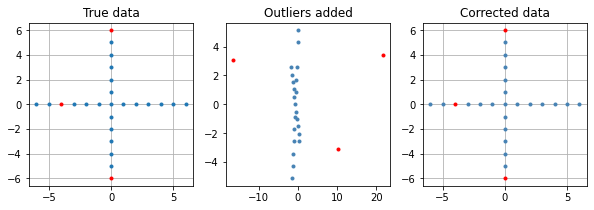

In [7]:
### Plot in 2D using the two largest eigenvalues - Fig.2

normal_indices=[i for i in range(num_point) if i not in outlier_indices] # list of normal points 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3))

# plot original graph
va, ve, Xe = MDS(ori_dis_sq)
ax1.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.')
ax1.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red')
ax1.set_title("True data")
ax1.grid()

# plot original graphs with outliers added 
va, ve, Xe = MDS(out_dis_sq)
ax2.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.', color='steelblue')
ax2.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red')
ax2.set_title("Outliers added")

# plot correct outliers 
va, ve, Xe = MDS(corr_dis_sq)   
ax3.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.', color='steelblue')
ax3.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red')
ax3.set_title("Corrected data")
ax3.grid()
plt.show()

Section 2.1.2: Main subspace of dimension 2

In [8]:
### test data, read in a dataset of main dimension 2
df_dim2 = pd.read_csv(r'outputs/bdd_synthetic_rdim2.csv',sep=';',header=None)
df_dim2.head()

,0,1,2,3,4,5,6
0,2.452053,14.139871,0.0,2.999707,10.000039,-0.000017,2.000157
1,0.310711,7.424162,0.0,3.000402,10.000057,0.000006,1.999961
2,2.628933,10.753720,0.0,2.999833,10.000110,-0.000013,2.000419
3,0.539242,7.274525,0.0,3.000539,10.000024,0.000084,1.999873
4,2.177256,12.992947,0.0,2.999768,9.999993,-0.000127,1.999713


In [9]:
### Processing datasets and computing pairwise distances
num_point = df_dim2.shape[0]
ori_dis = pdist(df_dim2.copy()) # compute pairwise distance in data
ori_dis_sq = squareform(ori_dis) # true pairwise distance in squared form

In [10]:
### Add outliers
prop = 0.05
num_outliers = int(np.ceil(prop * num_point))

# random draw of outliers 
indices = np.sort(alea.sample(range(num_point),num_outliers))
for n in indices:
    outlier = alea.uniform(-30,30)
    # only add outliers to the third dimension for the visualization purpose
    print(outlier)
    df_dim2.loc[n,2] = outlier 
    
df_dim2.head(20)

-10.126985301854411
-6.853462693876743
3.379920705936698
-3.90471610732704
-24.51988241526461
4.859121390159096
0.17718427170173712
11.932470715609561
-22.074856348532997
20.84133277225233


,0,1,2,3,4,5,6
0,2.452053,14.139871,0.0,2.999707,10.000039,-0.000017,2.000157
1,0.310711,7.424162,0.0,3.000402,10.000057,0.000006,1.999961
2,2.628933,10.753720,0.0,2.999833,10.000110,-0.000013,2.000419
3,0.539242,7.274525,0.0,3.000539,10.000024,0.000084,1.999873
4,2.177256,12.992947,0.0,2.999768,9.999993,-0.000127,1.999713
5,1.317156,10.209190,0.0,3.000313,10.000222,-0.000179,2.000309
6,3.298468,10.537750,0.0,2.999924,10.000027,0.000173,2.000056
7,3.856923,-0.379700,0.0,2.999964,10.000147,-0.000008,2.000160
8,1.422330,11.994828,0.0,2.999797,9.999861,-0.000016,2.000207
9,-1.019836,8.937990,0.0,2.999879,10.000052,-0.000269,1.999873


In [11]:
### Preparing pairwise distances

""" euclidean distances """
out_dis=pdist(df_dim2) # pairwise distance in tab (with outliers added)
out_dis_sq=squareform(out_dis) # squared matrix form of D

In [12]:
### Run n-Simplices method
T1=time.time()
outlier_indices,rdim,corr_dis_sq,corr_coord = nsimplices(out_dis_sq, df_dim2.shape[1], dim_start = 1, dim_end = 7)
T2=time.time()
print("running time is:", T2-T1)
print("subspace dimension is:", rdim)

med_height is: [2.29155864e+00 9.84138677e-04 4.81420773e-04 3.01463610e-04
 1.61613601e-04 4.23505393e-07 1.92446578e-07]
subspace_dim one is: 2
subspace_heights for dimension 2 is: [8.82832037e-04 8.18707408e-04 9.47081896e-04 9.03007119e-04
 8.82326947e-04 6.71463054e-04 9.71321152e-04 1.78094960e-03
 6.00268608e-04 1.00975221e-03 8.27347446e-04 9.29284151e-04
 1.01333693e-03 9.92700733e-04 8.32436363e-04 1.39119760e-03
 8.39985738e-04 1.45076228e-03 1.48987703e-03 1.86338349e-03
 1.02965610e-03 1.03222453e-03 5.95252924e-04 1.57701931e-03
 1.34654462e-03 7.52598702e-04 1.01269853e+01 1.10914374e-03
 6.85346277e+00 3.37992086e+00 9.61433826e-04 2.22297022e-03
 8.18427279e-04 8.40726481e-04 1.37730846e-03 3.90471616e+00
 7.03935662e-04 8.72217968e-04 8.93846713e-04 1.44682729e-03
 1.39890338e-03 1.12989616e-03 9.85555951e-04 7.70747397e-04
 7.15053566e-04 1.09095995e-03 1.19669556e-03 5.59862008e-04
 1.15363976e-03 5.93807496e-04 1.44067938e-03 7.50184192e-04
 2.45198824e+01 7.419414

outlier: [ 9.94468141e-01  1.04410984e+01 -1.01269853e+01  2.99973025e+00
  1.00000111e+01  8.27319002e-05  2.00022066e+00]
outlier: [-4.83753342e-01  2.11366593e+00 -6.85346269e+00  3.00037782e+00
  1.00000153e+01  2.21742836e-06  2.00029346e+00]
outlier: [ 3.16112181e+00  3.98964545e+00  3.37992071e+00  2.99958816e+00
  1.00000798e+01 -9.38157740e-05  1.99979643e+00]
outlier: [ 2.19141505e+00  1.58240543e+01 -3.90471611e+00  3.00016743e+00
  9.99986746e+00 -7.51852566e-05  2.00019536e+00]
outlier: [ 1.67853138e+00  7.98372615e+00 -2.45198824e+01  2.99997819e+00
  9.99992525e+00  1.06999213e-04  1.99990380e+00]
outlier: [-2.44764702e+00  1.00512364e+01  4.85912139e+00  3.00070787e+00
  9.99983941e+00 -1.31414912e-04  2.00037875e+00]
outlier: [ 3.50770558e+00  3.90425816e+00  1.19324707e+01  3.00002799e+00
  1.00002783e+01 -8.78954749e-05  2.00001989e+00]
outlier: [ 1.97400233e+00  9.93352443e+00 -2.20748563e+01  2.99972204e+00
  1.00000099e+01  4.24050724e-05  1.99983742e+00]
outlier:

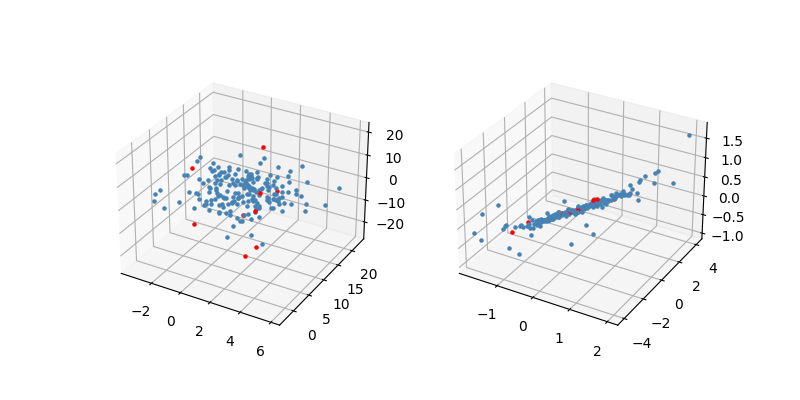

original coord is:           0          1    2         3          4         5         6
0  2.452053  14.139871  0.0  2.999707  10.000039 -0.000017  2.000157
1  0.310711   7.424162  0.0  3.000402  10.000057  0.000006  1.999961
2  2.628933  10.753720  0.0  2.999833  10.000110 -0.000013  2.000419
3  0.539242   7.274525  0.0  3.000539  10.000024  0.000084  1.999873
4  2.177256  12.992947  0.0  2.999768   9.999993 -0.000127  1.999713
5  1.317156  10.209190  0.0  3.000313  10.000222 -0.000179  2.000309
6  3.298468  10.537750  0.0  2.999924  10.000027  0.000173  2.000056
7  3.856923  -0.379700  0.0  2.999964  10.000147 -0.000008  2.000160
8  1.422330  11.994828  0.0  2.999797   9.999861 -0.000016  2.000207
9 -1.019836   8.937990  0.0  2.999879  10.000052 -0.000269  1.999873
corr_coord is:           0         1         2         3         4         5         6
0  0.627502  1.520026  0.316381  0.419612  3.081212  1.662384  0.571743
1 -0.461162 -0.834128 -0.094559 -0.744548 -2.429771 -1.454218 -

In [13]:
### Section 2.1.2
### Plot in 3D using the first three dimensions - Fig.3(A) 
%matplotlib widget

ori_coord=np.array(df_dim2)

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121, projection='3d')

# plot the original coordinates

for i in range(num_point):
    e=ori_coord[i]
    if (i in outlier_indices):
        print("outlier:", e)
        ax1.scatter(e[0],e[1],e[2], s=5, color='red')
    else:
        ax1.scatter(e[0],e[1],e[2], s=5, color='steelblue')
# plt.show()

ax2 = fig.add_subplot(122, projection='3d')

# plot the corrected coordinates

for i in range(num_point):
    e=corr_coord[i]
    if (i in outlier_indices):
        print("outlier corrected:", e)
        ax2.scatter(e[0],e[1],e[2], s=5, color='red')
    else:
        ax2.scatter(e[0],e[1],e[2], s=5, color='steelblue')
plt.show() 


print("original coord is:", df_dim2.head(10))
print("corr_coord is:", pd.DataFrame(corr_coord).head(10))


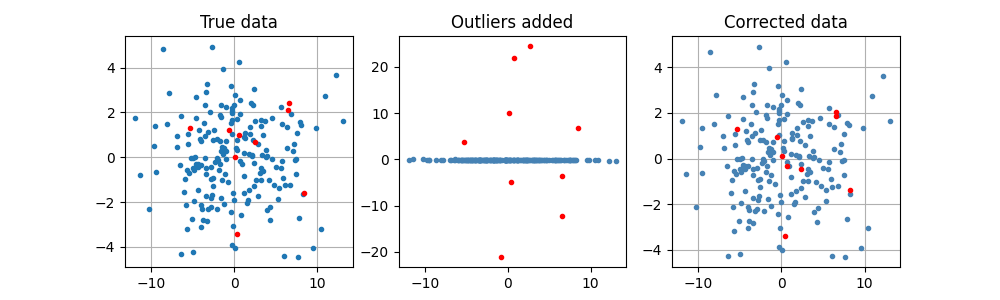

In [14]:
### Section 2.1.2
### Plot in 2D using the two largest eigenvalues - Fig.3(B) 

normal_indices=[i for i in range(num_point) if i not in outlier_indices] # list of normal points 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3))

# plot original graph
va, ve, Xe = MDS(ori_dis_sq)
ax1.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.')
ax1.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red')
ax1.set_title("True data")
ax1.grid()

# plot original graphs with outliers added 
va, ve, Xe = MDS(out_dis_sq)
ax2.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.', color='steelblue')
ax2.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red')
ax2.set_title("Outliers added")

# plot correct outliers 
va, ve, Xe = MDS(corr_dis_sq)   
ax3.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.', color='steelblue')
ax3.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red')
ax3.set_title("Corrected data")
ax3.grid()
plt.show()

Section 2.1.3: Main subspace of higher dimensions

In [27]:
### Prepare for section 2.1.3

### test data, read in a dataset of main dimension 10
df_dim10 = pd.read_csv(r'outputs/bdd_synthetic_rdim10.csv',sep=';',header=None)
df_dim10.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,9.712217,10.221432,4.205310,0.833751,1.884231,3.206389,5.297644,10.391421,0.985986,-7.033888,0.000064,-0.000107,2.000016
1,-4.285761,19.985170,-2.754183,-1.132730,8.614203,2.796551,2.254176,14.085787,-6.062418,2.579588,0.000107,-0.000203,2.000115
2,0.977065,9.108785,5.332529,0.884058,13.976334,-2.970480,2.931574,6.298675,6.583953,-3.348908,0.000113,0.000037,1.999959
3,-2.837787,6.872345,-2.523711,-2.669752,5.340098,8.193661,3.446173,6.936918,12.252271,-4.208636,0.000100,0.000097,2.000002
4,-1.715772,3.303310,-3.239483,-1.905739,8.792707,11.124729,-0.929558,7.160953,0.562720,-1.064336,0.000032,0.000133,2.000025


In [28]:
ori_dis = pdist(df_dim10.copy())
ori_dis_sq = squareform(ori_dis)
num_point =df_dim10.shape[0]

In [29]:
### Add outliers

prop=0.05
num_outliers=int(np.ceil(prop * num_point))
# random draw of outliers 
outlier_indices=np.sort(alea.sample(range(num_point),num_outliers))
print("outlier_indices are:", outlier_indices)
for n in outlier_indices:
    outlier=alea.uniform(-100,100)
    
    # for each row, add outliers to one of columns 10 to 15 (inclusive)
    # columns 10 to 15 are originally simulated with Guassian(2, 0.05)
    i=alea.randint(10,12) 
    df_dim10.loc[n,i] = outlier
df_dim10.head(50)
#  [ 10  19  92 106 126 145 158]

outlier_indices are: [ 31  32  35  54  67  86 106 110 119 218 241 250 254 276 326 349 350 385
 387 388]


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,9.712217,10.221432,4.205310,0.833751,1.884231,3.206389,5.297644,10.391421,0.985986,-7.033888,0.000064,-0.000107,2.000016
1,-4.285761,19.985170,-2.754183,-1.132730,8.614203,2.796551,2.254176,14.085787,-6.062418,2.579588,0.000107,-0.000203,2.000115
2,0.977065,9.108785,5.332529,0.884058,13.976334,-2.970480,2.931574,6.298675,6.583953,-3.348908,0.000113,0.000037,1.999959
3,-2.837787,6.872345,-2.523711,-2.669752,5.340098,8.193661,3.446173,6.936918,12.252271,-4.208636,0.000100,0.000097,2.000002
4,-1.715772,3.303310,-3.239483,-1.905739,8.792707,11.124729,-0.929558,7.160953,0.562720,-1.064336,0.000032,0.000133,2.000025
5,-6.051341,15.825022,3.179905,-2.666471,10.729691,8.803783,0.576599,5.129815,3.842351,-8.644062,-0.000131,-0.000117,1.999988
6,-2.478595,21.284637,5.102860,-9.259710,5.110152,7.578749,2.985901,9.355286,9.145118,-3.092305,-0.000078,-0.000036,2.000006
7,0.472294,17.031473,2.478207,-4.502968,1.033635,11.369840,-11.736079,15.683129,-2.845655,-8.119302,0.000007,0.000113,1.999936
8,2.312550,8.804409,-2.590972,2.760300,13.758915,9.985531,1.919433,17.937998,-1.397857,-2.910922,-0.000039,-0.000145,2.000163
9,5.604303,3.133369,-4.723897,-1.340376,20.479026,9.828262,3.972506,22.876739,3.654208,1.594737,-0.000059,-0.000082,1.999875


In [30]:
### Preparing pairwise distances for the dataset with outliers

""" euclidean distances """
out_dis=pdist(df_dim10)
out_dis_sq=squareform(out_dis)


In [31]:
### Run nSimplices method
T1=time.time()
outlier_indices,subspace_dim,corr_dis_sq,corr_coord = nsimplices(out_dis_sq, df_dim10.shape[1], dim_start=1, dim_end=df_dim10.shape[1])
T2=time.time()
print("running time is:", T2-T1)
print("subspace dimension is:", subspace_dim)

med_height is: [1.81588926e+01 1.60080509e+01 1.44721431e+01 1.31974757e+01
 1.17594793e+01 1.04149218e+01 8.84859430e+00 7.05184682e+00
 4.78284819e+00 3.72577153e-03 4.54164474e-04 1.86052060e-04
 1.06700491e-06]
subspace_dim one is: 10
subspace_heights for dimension 10 is: [3.05947829e-03 2.55221534e-03 4.08849938e-03 1.16665660e-03
 3.68239152e-03 3.21837649e-03 3.23938112e-03 7.44143705e-01
 2.03577250e-02 2.66242148e-03 1.70850903e+00 7.56712790e-03
 2.42962375e-03 3.41423999e-03 4.25226196e-03 2.33555893e-03
 1.40474637e-03 6.94531790e-03 1.34837353e-03 1.39003057e-02
 1.15609987e-02 4.10349740e-01 4.89478967e-03 3.78309121e-03
 1.08395397e-03 2.61698488e-03 2.88644226e-03 9.19298146e-03
 1.05890545e-02 2.00757216e-03 1.47926419e-03 7.25332112e+01
 5.44944603e+01 6.37390687e-03 2.20286545e-03 1.67905169e+01
 5.04834150e-03 1.16575443e-02 3.68071984e-02 2.01404558e-03
 3.64986290e-03 5.45002157e-03 5.88182835e-01 9.03539398e-03
 2.55821603e-01 1.70657656e-03 1.84203910e-02 5.2808

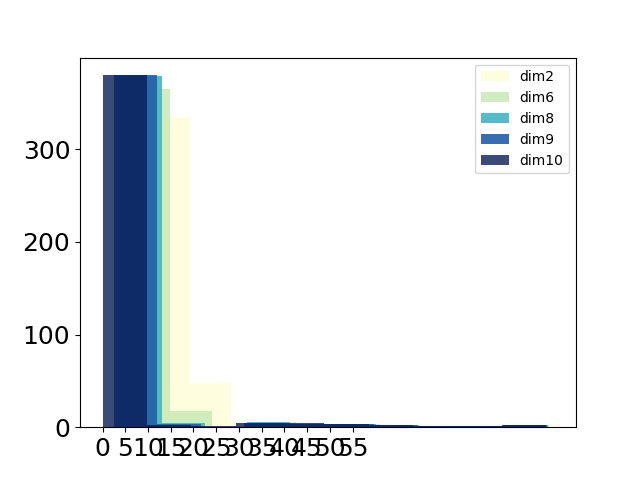

In [32]:
### Importance of dimension correction in higher dimension - Fig.4(A) height distribution 

hcolls = []
start_dim = 2
end_dim = 15
for dim in range(start_dim, end_dim+1):
    heights = nsimplices_all_heights(num_point, out_dis_sq, dim, seed=dim+1)
    hcolls.append(heights)

blues=np.array([[255,255,217,256*0.8],[199,233,180,256*0.8], [65,182,196,256*0.9], [34,94,168,256*0.9], [8,29,88,256*0.8]])/256

plt.figure()
# select a few dimensions (i.e. 2,6,8,9,10) for demonstrating the distributions of heights
plt.hist(hcolls[2-start_dim],label='dim2',color=blues[0])
plt.hist(hcolls[6-start_dim],label='dim6',color=blues[1])
plt.hist(hcolls[8-start_dim],label='dim8',color=blues[2])
plt.hist(hcolls[9-start_dim],label='dim9',color=blues[3])
plt.hist(hcolls[10-start_dim],label='dim10',color=blues[4])

plt.xticks(np.arange(0, 60, 5))
plt.legend()
plt.show()


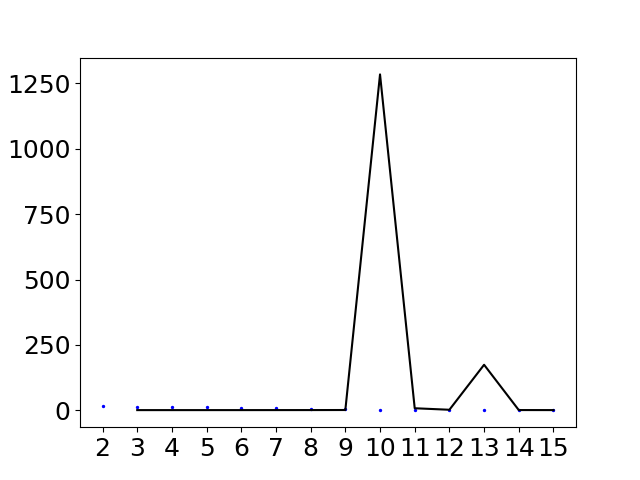

In [33]:
### Importance of dimension correction in higher dimension - Fig.4(B) dimensionality inference

# calculate median heights for tested dimension from start_dim to end_dim
h_meds = []
for hcoll in hcolls:
    h_meds.append(np.median(hcoll))

# calculate the ratio, where h_med_ratios[i] corresponds to h_meds[i-1]/h_meds[i]
# which is the (median height of dim (i-1+start_dim))/(median height of dim (i+start_dim))
h_med_ratios = []
for i in range(1, len(hcolls)):
    # print("dim", start_dim+i-1, "ratio is:", h_meds[i-1]/h_meds[i], h_meds[i-1], h_meds[i])
    h_med_ratios.append(h_meds[i-1]/h_meds[i])

# plot the height scatterplot and the ratios

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y1-axis', color = color)
ax1.scatter(list(range(start_dim, end_dim+1)), h_meds, color = color)
ax1.tick_params(axis ='y', labelcolor = color)
 
# Adding Twin Axes to plot using dataset_2
ax2 = ax1.twinx()
 
color = 'tab:green'
ax2.set_ylabel('Y2-axis', color = color)
ax2.plot(list(range(start_dim+1, end_dim+1)), h_med_ratios, color = color)
ax2.tick_params(axis ='y', labelcolor = color)
 
# Adding title
plt.title('Use different y-axes on the left and right of a Matplotlib plot', fontweight ="bold")
 
# Show plot
plt.show()

# plt.figure()
# plt.scatter(list(range(start_dim, end_dim+1)), h_meds, c ="blue", s=2)
# plt.plot(list(range(start_dim+1, end_dim+1)), h_med_ratios, c="black")
# plt.xticks(np.arange(start_dim, end_dim+1, 1))
# plt.show()


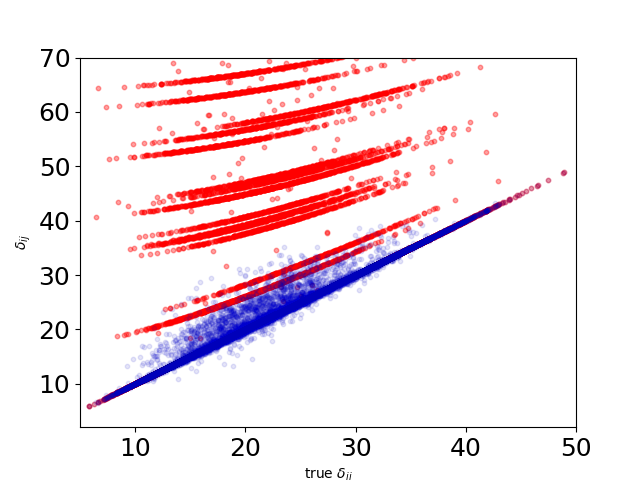

In [34]:
### Importance of dimension correction in higher dimension - Fig.4(C) Shepard Diagram

out_dis_flat=out_dis_sq.flatten() # [200*200]
ori_dis_flat=ori_dis_sq.flatten()
corr_dis_flat=corr_dis_sq.flatten()

plt.figure()
SMALL_SIZE=18
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.scatter(ori_dis_flat,out_dis_flat,color='red',alpha=0.2,s=10)
plt.scatter(ori_dis_flat,corr_dis_flat,color='mediumblue',alpha=0.05,s=10)

plt.xlabel(r"true $\delta_{ij}$")
plt.ylabel(r'$\delta_{ij}$')
axes = plt.gca()
axes.set_xlim(5,50)
axes.set_ylim(2,70)

plt.show()


Section 2.1.4: Dimension correction in higher dimensions

In [35]:
# Read in dataset of main dimension 40
df_dim40 = pd.read_csv(r'outputs/bdd_synthetic_rdim40.csv',sep=';',header=None)
df_dim40.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,3.271179,-0.288140,1.003954,-5.672843,-8.174563,9.381343,0.652946,7.204627,5.287367,1.403878,...,7.134084,14.527434,-0.543498,-0.872188,-0.000068,-0.000077,4.999888,-0.000021,9.378589e-05,1.999910
1,8.408560,13.288566,-1.595746,1.045023,9.024490,4.167615,2.073387,5.614335,7.053868,-8.313852,...,1.433317,8.700117,-0.368710,1.639121,-0.000043,0.000047,5.000050,-0.000073,-3.361122e-05,2.000048
2,0.589400,12.175038,1.179524,3.165649,9.050043,14.157003,0.025747,14.501764,-3.270914,-2.021222,...,6.089331,5.790368,5.424499,7.801971,0.000104,0.000198,5.000080,-0.000108,4.431686e-07,1.999999
3,-5.286257,8.455824,7.074286,-4.139334,1.160208,5.619972,-1.438155,10.767016,-2.156296,-1.757692,...,-7.783939,3.240802,-0.436022,4.212766,-0.000066,0.000091,5.000149,0.000020,-1.204999e-05,2.000105
4,4.081563,8.452946,10.953974,3.921005,2.301202,2.826354,-3.099561,13.775860,12.594311,1.236560,...,1.655609,11.491205,6.224757,2.814955,-0.000121,0.000104,4.999999,0.000071,1.831110e-04,1.999894


In [36]:
prop = 0.04
df_outlier = sim_outliers(df_dim40, prop, 40, 45)
out_dis=pdist(df_outlier) # pairwise distance in tab (with outliers added)
out_dis_sq=squareform(out_dis) # squared matrix form of D
subspace_dim, _ = find_subspace_dim(out_dis_sq, 30, df_outlier.shape[1])

print("subspace_dim is:", subspace_dim)

med_height is: [1.67593894e+01 1.57220164e+01 1.49382720e+01 1.40135282e+01
 1.31635438e+01 1.22294054e+01 1.10469521e+01 9.59302837e+00
 8.43651012e+00 6.87449625e+00 4.36002180e+00 2.75246818e-02
 1.45011469e-03 8.10346699e-04 4.93581755e-04 2.43324713e-04
 4.88672141e-06]
subspace_dim one is: 41
subspace_heights for dimension 41 is: [6.80867116e-03 9.07923921e-01 3.22854707e-03 2.74277737e-01
 5.76712329e+01 1.35896570e-02 1.89278816e+00 1.80855867e-02
 1.71667928e-02 1.45029336e-02 8.68355488e-03 3.18960892e-03
 1.86591786e-02 1.14038741e+00 5.45989182e-03 5.04332145e-03
 3.27535048e-02 4.44767749e-03 1.43847284e+00 6.36422953e-03
 1.42207237e+00 6.91569494e-01 2.76315059e-02 1.70543342e-02
 3.34898726e-03 9.09746852e-01 5.41117021e-03 7.01922397e-01
 6.66276837e-01 4.33231811e-02 5.67163591e-02 2.73854574e-02
 1.24689698e-02 8.20577857e-03 5.20744320e-02 2.20588159e-02
 9.43365470e-03 1.71102561e-02 6.33617223e-03 7.30776259e-03
 1.94214210e-02 4.98578349e-03 1.30161850e+00 1.5628

In [37]:
props = np.arange(0, 0.14, 0.02)
dim_pred_diff = []
dim_raw_diff= []
true_dim = 40
num_components = 50
for prop in props:
    df_outlier = sim_outliers(df_dim40, prop, 40, 45)
    out_dis=pdist(df_outlier) # pairwise distance in tab (with outliers added)
    out_dis_sq=squareform(out_dis) # squared matrix form of D
    subspace_dim, _ = find_subspace_dim(out_dis_sq, 30, df_outlier.shape[1])
    dim_pred_diff.append(subspace_dim - true_dim)
    dim_raw_diff.append(subspace_dim + int((subspace_dim * prop) - true_dim))
    print("subspace_dim is:", subspace_dim)

med_height is: [1.56324674e+01 1.45999179e+01 1.37853404e+01 1.26884656e+01
 1.16816108e+01 1.05816919e+01 9.24135524e+00 7.69930128e+00
 5.98135022e+00 3.36196237e+00 2.20915627e-03 1.15161617e-03
 7.91325569e-04 5.75540286e-04 3.86768685e-04 2.02363879e-04
 4.84167846e-06]
subspace_dim one is: 40
subspace_heights for dimension 40 is: [0.00172581 0.00197363 0.0020408  0.00189568 0.00194    0.00207504
 0.00288976 0.00272105 0.00239214 0.0020718  0.00189847 0.00161565
 0.00206986 0.00265624 0.00270106 0.00204233 0.00222948 0.00210428
 0.00220958 0.00217094 0.00259684 0.00210644 0.00183356 0.00287802
 0.00211663 0.00244201 0.00244446 0.00221044 0.00200977 0.0022387
 0.0026806  0.00184136 0.00241305 0.0022205  0.00164755 0.00179394
 0.00233745 0.00194743 0.00224039 0.00202712 0.00262219 0.00231593
 0.00199307 0.00247231 0.00220054 0.00307105 0.0026368  0.00261501
 0.00337816 0.00194034 0.00187575 0.0024891  0.00317259 0.002007
 0.00196066 0.00228344 0.00249421 0.00217144 0.0020268  0.0016

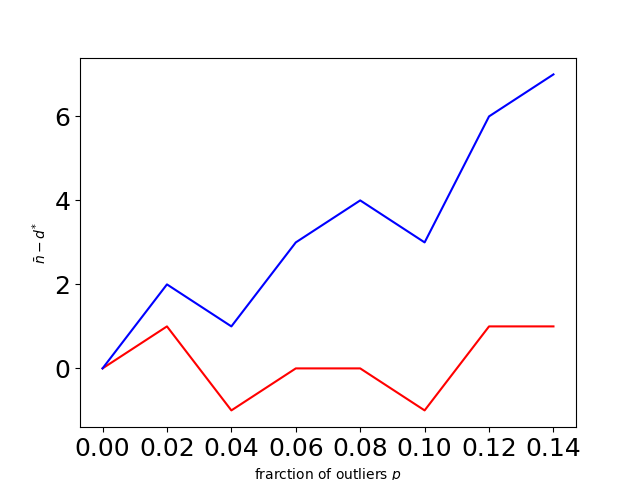

In [38]:
plt.figure()
plt.plot(props, dim_pred_diff, c="red", label = "after correction")
plt.plot(props, dim_raw_diff, c="blue", label = "before correction")
plt.xticks(props)
plt.xlabel(r'frarction of outliers $p$')
plt.ylabel(r'$\bar{n}-d^{*}$')
plt.show()